# Case Study 1: Finding the winning strategy in a card game

## 1 | Computing probabilities using Python

### 1.1 Sample space analysis: An equation-free approach for measuring uncertainty in outcomes  


In [1]:
sample_space = {'Heads', 'Tails'}

In [2]:
print(sample_space)

{'Tails', 'Heads'}


In [3]:
probability_heads = 1 / len(sample_space)
print(f'Probability of choosing heads is {probability_heads}')

Probability of choosing heads is 0.5


In [4]:
#1.3 

def is_heads_or_tails(outcome):
  return outcome in {'Heads', 'Tails'}

def is_neither(outcome):
  return not is_heads_or_tails(outcome)

#1.4 

def is_heads(outcome):
  return outcome == 'Heads'

def is_tails(outcome):
  return outcome == 'Tails'

In [5]:
#1.5

def get_matching_event(event_condition, sample_space):
  return set([outcome for outcome in sample_space
          if event_condition(outcome)])


In [6]:
#1.6 

event_conditions = [is_heads_or_tails, is_heads, is_tails, is_neither]

for event_condition in event_conditions:
  print(f"Event Condition: {event_condition.__name__}")
  event = get_matching_event(event_condition, sample_space)
  print(f'Event: {event}\n')


Event Condition: is_heads_or_tails
Event: {'Heads', 'Tails'}

Event Condition: is_heads
Event: {'Heads'}

Event Condition: is_tails
Event: {'Tails'}

Event Condition: is_neither
Event: set()



In [7]:
#1.7

def compute_probability(event_condition, generic_sample_space):
  event = get_matching_event(event_condition, generic_sample_space)
  return len(event) / len(generic_sample_space)

for event_condition in event_conditions:
  prob = compute_probability(event_condition, sample_space)
  name = event_condition.__name__
  print(f"Probability of event arising from '{name}' is '{prob}'" )

Probability of event arising from 'is_heads_or_tails' is '1.0'
Probability of event arising from 'is_heads' is '0.5'
Probability of event arising from 'is_tails' is '0.5'
Probability of event arising from 'is_neither' is '0.0'


1.1.1 Analyzing a biased coin


In [8]:
#1.8

weighted_sample_space = {'Heads': 4, 'Tails': 1}

In [9]:
#1.9 

sample_space_size = sum(weighted_sample_space.values())
assert sample_space_size == 5

In [10]:
#1.10 

event = get_matching_event(is_heads_or_tails, weighted_sample_space)
event_size = sum(weighted_sample_space[outcome] for outcome in event)
assert event_size == 5

In [11]:
#1.11

def compute_event_probability(event_condition, generic_sample_space):
  event = get_matching_event(event_condition, generic_sample_space)
  if type(generic_sample_space) == type(set()):
    return len(event) / len(generic_sample_space)
  event_size = sum(generic_sample_space[outcome]
                 for outcome in event)
  return event_size / sum(generic_sample_space.values()) 


In [12]:
for event_condition in event_conditions:
  prob = compute_event_probability(event_condition, weighted_sample_space)
  name = event_condition.__name__
  print(f"Probability of event arising from '{name}' is '{prob}'")


Probability of event arising from 'is_heads_or_tails' is '1.0'
Probability of event arising from 'is_heads' is '0.8'
Probability of event arising from 'is_tails' is '0.2'
Probability of event arising from 'is_neither' is '0.0'


In [13]:
for event_condition in event_conditions:
  prob = compute_event_probability(event_condition, sample_space)
  name = event_condition.__name__
  print(f"Probability of event arising from '{name}' is '{prob}'")

Probability of event arising from 'is_heads_or_tails' is '1.0'
Probability of event arising from 'is_heads' is '0.5'
Probability of event arising from 'is_tails' is '0.5'
Probability of event arising from 'is_neither' is '0.0'


### 1.2 Computing nontrivial probabilities 

1.2.1 Problem 1: Analyzing a family with four children

In [14]:
possible_children = ['Boy', 'Girl']
sample_space = set()
for child1 in possible_children:
  for child2 in possible_children:
    for child3 in possible_children:
      for child4 in possible_children:
        for child5 in possible_children:
          outcome = (child1, child2, child3, child4, child5)
          sample_space.add(outcome)
          

In [15]:
#1.14 itertools

from itertools import product

all_combinations = product(* (5 * [possible_children]))
assert set(all_combinations) == sample_space


In [16]:
print(sample_space)

{('Girl', 'Boy', 'Girl', 'Boy', 'Boy'), ('Boy', 'Girl', 'Girl', 'Girl', 'Boy'), ('Girl', 'Girl', 'Girl', 'Girl', 'Girl'), ('Boy', 'Boy', 'Girl', 'Girl', 'Girl'), ('Boy', 'Boy', 'Boy', 'Girl', 'Boy'), ('Girl', 'Boy', 'Boy', 'Girl', 'Girl'), ('Girl', 'Boy', 'Boy', 'Boy', 'Girl'), ('Girl', 'Girl', 'Girl', 'Boy', 'Girl'), ('Boy', 'Girl', 'Girl', 'Boy', 'Boy'), ('Boy', 'Boy', 'Boy', 'Boy', 'Boy'), ('Girl', 'Girl', 'Boy', 'Girl', 'Boy'), ('Girl', 'Girl', 'Boy', 'Boy', 'Boy'), ('Boy', 'Boy', 'Girl', 'Boy', 'Girl'), ('Girl', 'Girl', 'Girl', 'Girl', 'Boy'), ('Girl', 'Boy', 'Girl', 'Girl', 'Girl'), ('Boy', 'Boy', 'Girl', 'Girl', 'Boy'), ('Boy', 'Girl', 'Boy', 'Girl', 'Girl'), ('Girl', 'Boy', 'Boy', 'Girl', 'Boy'), ('Girl', 'Boy', 'Boy', 'Boy', 'Boy'), ('Girl', 'Girl', 'Girl', 'Boy', 'Boy'), ('Boy', 'Girl', 'Boy', 'Boy', 'Girl'), ('Girl', 'Boy', 'Girl', 'Boy', 'Girl'), ('Boy', 'Boy', 'Girl', 'Boy', 'Boy'), ('Boy', 'Girl', 'Girl', 'Girl', 'Girl'), ('Girl', 'Boy', 'Girl', 'Girl', 'Boy'), ('Boy', 'B

In [17]:
sample_space_efficient = set(product(possible_children, repeat=5))
assert sample_space == sample_space_efficient

In [18]:
#1.16 2 boys

def has_two_boys(outcome): 
  return len([child for child in outcome
                  if child == 'Girl']) == 5

prob = compute_event_probability(has_two_boys, sample_space)
print(f"Probability of 5 girls is {prob}")

Probability of 5 girls is 0.03125


1.2.2 Problem 2: Analyzing multiple die rolls

In [19]:
# 1.2.2 multiple die rolls

possible_rolls = list(range(1,7))
print(possible_rolls)

[1, 2, 3, 4, 5, 6]


In [20]:
#1.18

sample_space = set(product(possible_rolls, repeat=6))

In [21]:
def has_sum_of_21(outcome):
  return sum(outcome) == 21

prob = compute_event_probability(has_sum_of_21, sample_space)
print(f'6 rolls sum to 21 with a probability of {prob}')


6 rolls sum to 21 with a probability of 0.09284979423868313


In [22]:
prob = compute_event_probability(lambda x: sum(x) == 21, sample_space)
assert prob == compute_event_probability(has_sum_of_21, sample_space)

print(f'6 rolls sum to 21 with a probability of {prob}')


6 rolls sum to 21 with a probability of 0.09284979423868313


1.2.3 Problem 3: Computing die-roll probabilities using weighted sample spaces

In [23]:
#1.2.3 die-roll weighted sample spaces

from collections import defaultdict
weighted_sample_space = defaultdict(int)

for outcome in sample_space:
  total = sum(outcome)
  weighted_sample_space[total] += 1

In [24]:
print(weighted_sample_space)

defaultdict(<class 'int'>, {21: 4332, 22: 4221, 27: 1666, 12: 456, 24: 3431, 19: 3906, 18: 3431, 20: 4221, 23: 3906, 26: 2247, 28: 1161, 15: 1666, 17: 2856, 13: 756, 14: 1161, 30: 456, 16: 2247, 25: 2856, 9: 56, 32: 126, 31: 252, 29: 756, 11: 252, 33: 56, 10: 126, 7: 6, 35: 6, 8: 21, 34: 21, 6: 1, 36: 1})


In [25]:
#1.22

assert weighted_sample_space[6] == 1
assert weighted_sample_space[36] == 1

In [26]:
num_combinations = weighted_sample_space[21]
print(f'There are {num_combinations} ways for 6 die rolls to sum to 21')

There are 4332 ways for 6 die rolls to sum to 21


In [27]:
#1.26 

prob = compute_event_probability(lambda x: x == 21, 
                                weighted_sample_space)
assert prob == compute_event_probability(has_sum_of_21, sample_space)
print(f'6 rolls sum to 21 with a probability of {prob}')


6 rolls sum to 21 with a probability of 0.09284979423868313


### 1.3 Computing probabilities over interval ranges

1.3.1 Evaluating extremes using interval analysis

In [28]:
print('Num elements unweighted sample space:', len(sample_space))

print('Num elements weighted sample space:', len(weighted_sample_space))


Num elements unweighted sample space: 46656
Num elements weighted sample space: 31


In [29]:
#1.3 interval ranges

def is_in_interval(num, min, max):
  return min <= num <= max



In [30]:
prob = compute_event_probability(lambda x: is_in_interval(x, 10, 21), weighted_sample_space)
print(f'prob interval is {prob}')

prob interval is 0.5446244855967078


In [31]:
#1.2.1 extremes interval

def generate_coin_sample_space(num_flips=10):
  weighted_sample_space = defaultdict(int)
  for coin_flips in product(['Heads', 'Tails'], repeat=num_flips):
    heads_count = len([outcome for outcome in coin_flips
                          if outcome == 'Heads'])
    weighted_sample_space[heads_count] += 1
  return weighted_sample_space
  
weighted_sample_space = generate_coin_sample_space()
assert weighted_sample_space[10] == 1
assert weighted_sample_space[9] == 10


In [32]:
prob = compute_event_probability(lambda x: is_in_interval(x, 8, 10), weighted_sample_space)
print(f'Prob more than 7 heads is {prob}')

Prob more than 7 heads is 0.0546875


In [33]:
prob = compute_event_probability(lambda x: not is_in_interval(x, 3, 7), weighted_sample_space)
print(f'prob 7+ heads or tails is {prob}')


prob 7+ heads or tails is 0.109375


In [34]:
weighted_sample_space_20_flips = generate_coin_sample_space(num_flips=20)
prob = compute_event_probability(lambda x: not is_in_interval(x, 5, 15), weighted_sample_space_20_flips)
print(f'prob 15+ h/t in 20 flips is {prob}')

prob 15+ h/t in 20 flips is 0.01181793212890625


## 2 | Plotting probabilities using Matplotlib


### 2.1 Basic Matplotlib plots

In [35]:
import matplotlib.pyplot as plt 

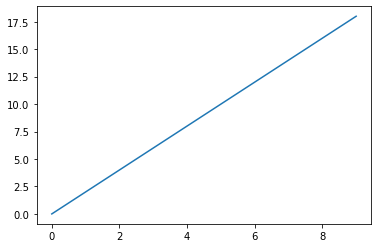

In [36]:
x = range(0,10)
y = [2 * value for value in x]
plt.plot(x,y)
plt.show()

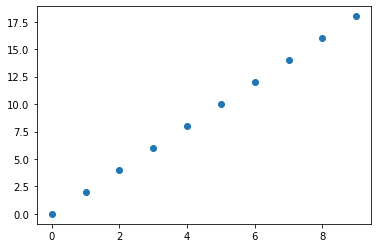

In [37]:
plt.scatter(x,y)
plt.show()

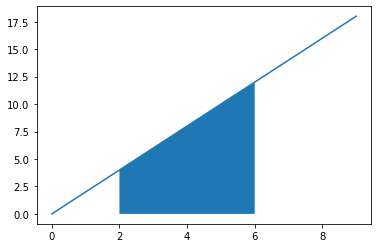

In [38]:
# Shading an interval beneath a connected plot
# The input of the where parameter is a list of Boolean values in which an element is True if the x value 
# at the corresponding index falls within the interval we specified

plt.plot(x,y)
where = [is_in_interval(value, 2, 6) for value in x]
plt.fill_between(x,y, where=where)
plt.show()

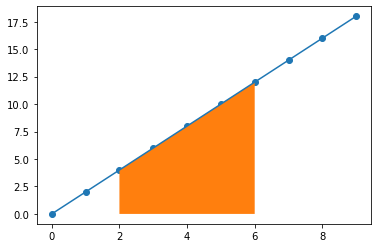

In [39]:
# Exposing individual coordinates within a continuous plot

plt.scatter(x,y)
plt.plot(x,y)
plt.fill_between(x, y, where=where)
plt.show()

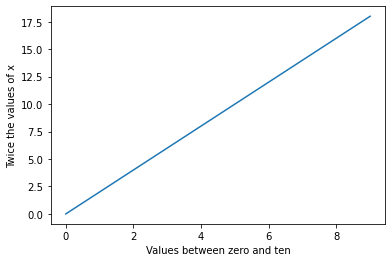

In [40]:
plt.plot(x, y)
plt.xlabel('Values between zero and ten')
plt.ylabel('Twice the values of x')
plt.show()

### 2.2 Plotting coin-flip probabilities

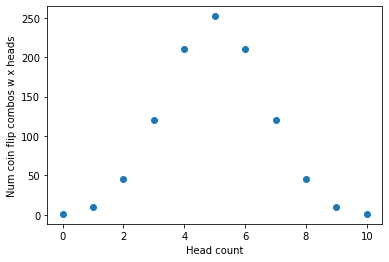

In [41]:
# Listing 2.7 Plotting the coin-flip weighted sample space

x_10_flips = list(weighted_sample_space.keys())
y_10_flips = [weighted_sample_space[key] for key in x_10_flips]
plt.scatter(x_10_flips, y_10_flips)
plt.xlabel('Head count')
plt.ylabel('Num coin flip combos w x heads')
plt.show()

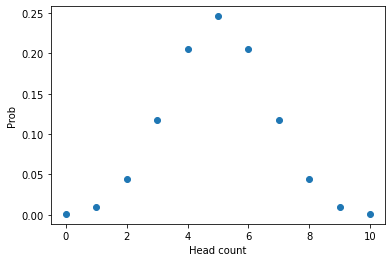

In [42]:
sample_space_size = sum(weighted_sample_space.values())
prob_x_10_flips = [value / sample_space_size for value in y_10_flips]
plt.scatter(x_10_flips, prob_x_10_flips)
plt.xlabel('Head count')
plt.ylabel('Prob')
plt.show()

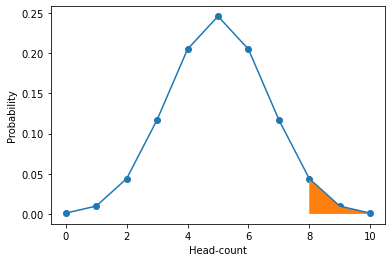

In [43]:
# Listing 2.10 Shading the interval under a probability curve

plt.plot(x_10_flips, prob_x_10_flips)
plt.scatter(x_10_flips, prob_x_10_flips)
where = [is_in_interval(value, 8, 10) for value in x_10_flips]
plt.fill_between(x_10_flips, prob_x_10_flips, where=where)
plt.xlabel('Head-count')
plt.ylabel('Probability')
plt.show()

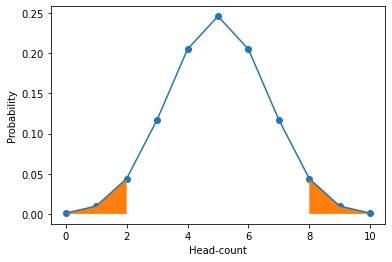

In [44]:
plt.plot(x_10_flips, prob_x_10_flips)
plt.scatter(x_10_flips, prob_x_10_flips)
where = [not is_in_interval(value, 3, 7) for value in x_10_flips]
plt.fill_between(x_10_flips, prob_x_10_flips, where=where)
plt.xlabel('Head-count')
plt.ylabel('Probability')
plt.show()

2.2.1 Comparing multiple coin-flip probability distributions

In [45]:
# Listing 2.12 Computing probabilities for a 20-coin-flip distribution

x_20_flips = list(weighted_sample_space_20_flips.keys())
y_20_flips = [weighted_sample_space_20_flips[key] for key in x_20_flips]
sample_space_size = sum(weighted_sample_space_20_flips.values())
prob_x_20_flips = [value / sample_space_size for value in y_20_flips]



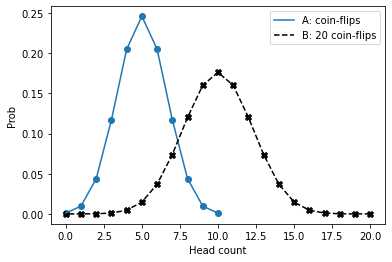

In [46]:
plt.plot(x_10_flips, prob_x_10_flips, label='A: coin-flips')
plt.scatter(x_10_flips, prob_x_10_flips)

plt.plot(x_20_flips, prob_x_20_flips, color='black', linestyle='--', label='B: 20 coin-flips')
plt.scatter(x_20_flips, prob_x_20_flips, color='k', marker='X')

plt.xlabel('Head count')
plt.ylabel('Prob')
plt.legend()
plt.show()

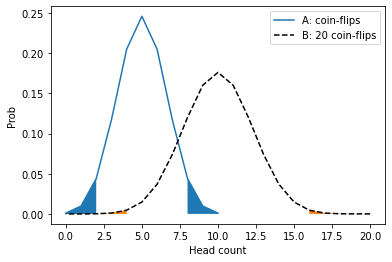

In [47]:
plt.plot(x_10_flips, prob_x_10_flips, label='A: coin-flips')
plt.plot(x_20_flips, prob_x_20_flips, color='black', linestyle='--', label='B: 20 coin-flips')

where_10 = [not is_in_interval(value, 3,7) for value in x_10_flips]
plt.fill_between(x_10_flips,prob_x_10_flips, where=where_10)

where_20 = [not is_in_interval(value, 5, 15) for value in x_20_flips]
plt.fill_between(x_20_flips,prob_x_20_flips, where=where_20)


# plt.scatter(x_10_flips, prob_x_10_flips)
# plt.scatter(x_20_flips, prob_x_20_flips, color='k', marker='X')

plt.xlabel('Head count')
plt.ylabel('Prob')
plt.legend()
plt.show()

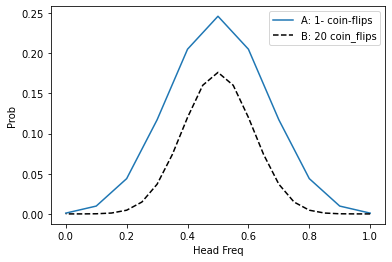

In [48]:
# Listing 2.15 Converting head counts into frequencies

x_10_freq = [head_count / 10 for head_count in x_10_flips]
x_20_freq = [head_count / 20 for head_count in x_20_flips]

plt.plot(x_10_freq, prob_x_10_flips, label='A: 1- coin-flips' )
plt.plot(x_20_freq, prob_x_20_flips, color='k', linestyle='--', label='B: 20 coin_flips')
plt.legend()
plt.xlabel('Head Freq')
plt.ylabel('Prob')
plt.show()

In [49]:
# Listing 2.16 Computing relative likelihoods of frequencies

relative_likelihood_10 = [10 * prob for prob in prob_x_10_flips]
relative_likelihood_20 = [20 * prob for prob in prob_x_20_flips]

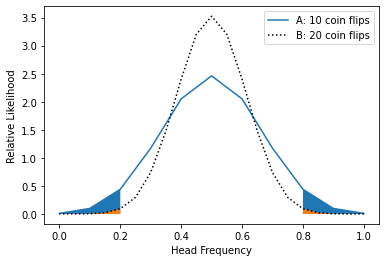

In [50]:
# Listing 2.17 Plotting aligned relative likelihood curves

plt.plot(x_10_freq, relative_likelihood_10, label='A: 10 coin flips')
plt.plot(x_20_freq, relative_likelihood_20, label='B: 20 coin flips', color='k', linestyle=':')

plt.fill_between(x_10_freq, relative_likelihood_10, where=where_10)
plt.fill_between(x_20_freq, relative_likelihood_20, where=where_20)

plt.legend()
plt.xlabel('Head Frequency')
plt.ylabel('Relative Likelihood')
plt.show()

Figure 2.13 The head-count frequencies for 10 coin flips (A) and 20 coin flips (B) plotted against their relative likelihoods. Shaded intervals beneath both plots represent an extreme number of heads and tails. The areas of these intervals correspond to probabilities because the total area of each plot sums to 1.0.

## 3 | Running random simulations in NumPy

### 3.1 Simulating random coin flips and die rolls using NumPy

In [51]:
import numpy as np

In [52]:
die_roll = np.random.randint(1,7) #last number exclusive
assert 1 <= die_roll <= 6

In [53]:
# Listing 3.3 Seeding reproducible random die rolls

np.random.seed(0)
die_rolls = [np.random.randint(1,7) for _ in range(3)]
assert die_rolls == [5,6,1]

In [54]:
# Listing 3.4 Simulating one fair coin flip

np.random.seed(0)
coin_flip = np.random.randint(0,2)
print(f"Coin landed on {'heads' if coin_flip == 1 else 'tails'}")

Coin landed on tails


In [55]:
# Listing 3.5 Simulating 10 fair coin flips 

np.random.seed(0)
def frequency_heads(coin_flip_sequence):
  total_heads = len([head for head in coin_flip_sequence if head == 1])
  return total_heads / len(coin_flip_sequence)

coin_flips = [np.random.randint(0,2) for _ in range(10)]
freq_heads = frequency_heads(coin_flips)
print(f"Frequency of Heads is {freq_heads}")

Frequency of Heads is 0.8


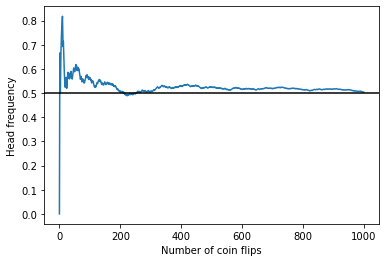

In [56]:
# Listing 3.6 Plotting simulated fair coin-flip frequencies

np.random.seed(0)
coin_flips =[]
frequencies = []

for _ in range(1000):
  coin_flips.append(np.random.randint(0,2))
  frequencies.append(frequency_heads(coin_flips))

plt.plot(list(range(1000)), frequencies)
plt.axhline(0.5, color='k')
plt.xlabel('Number of coin flips')
plt.ylabel('Head frequency')
plt.show()


Figure 3.1 The number of fair coin flips plotted against the observed head-count frequency. The frequency fluctuates wildly before stabilizing at around 0.5.

3.1.1 Analyzing biased coin flips

In [57]:
# Listing 3.7 Simulating biased coin flips

np.random.seed(0)
print("Let's flip the biased coin once.")
print(f"Biased coin landed on {'heads' if coin_flip == 1 else 'tails'}.")

print("\nLet's flip the biased coin 10 times.")
number_coin_flips = 10
head_count = np.random.binomial(number_coin_flips, 0.7)
print((f"{head_count} heads were observed out of "
        f"{number_coin_flips} biased coin flips"))

Let's flip the biased coin once.
Biased coin landed on tails.

Let's flip the biased coin 10 times.
7 heads were observed out of 10 biased coin flips


In [58]:
# Listing 3.8 Computing coin-flip-frequency convergence

np.random.seed(0)
head_count = np.random.binomial(1000, 0.7)
frequency = head_count / 1000
print(f"Frequency of Heads is {frequency}")


Frequency of Heads is 0.697


In [59]:
# Listing 3.9 Recomputing coin-flip-frequency convergence

np.random.seed(0)
assert np.random.binomial(1000, 0.7) / 1000 == 0.697

for i in range(1,6):
  head_count = np.random.binomial(1000, 0.7)
  frequency = head_count / 1000
  print(f"Frequency at iteration {i} is {frequency}")
  if frequency == 0.7:
    print("Frequency equals the probability!\n")
    

Frequency at iteration 1 is 0.69
Frequency at iteration 2 is 0.7
Frequency equals the probability!

Frequency at iteration 3 is 0.707
Frequency at iteration 4 is 0.702
Frequency at iteration 5 is 0.699


### 3.2 Computing confidence intervals using histograms and NumPy arrays

In [60]:
# Listing 3.10 Computing frequencies with 500 flips per sample

np.random.seed(0)
head_count_list = [np.random.binomial(1000, 0.7) for _ in range(500)]

In [61]:
# Listing 3.11 Optimizing the coin-flip-frequency computation

np.random.seed(0)
head_count_array = np.random.binomial(1000, 0.7, 500) #output is a numpy array data structure (not a python list)
# print(head_count_array) 

In [62]:
assert head_count_array.tolist() == head_count_list

new_array = np.array(head_count_list)
assert np.array_equal(new_array, head_count_array) == True

In [63]:
# Listing 3.14 Computing frequencies using NumPy

frequency_array = head_count_array / 1000
assert frequency_array.tolist() == [head_count / 1000 for head_count in head_count_list]
assert frequency_array.tolist() == list(map(lambda x: x / 1000, head_count_list))

In [64]:
# Listing 3.15 Printing a NumPy frequency array

print(frequency_array[:20])

[0.697 0.69  0.7   0.707 0.702 0.699 0.723 0.67  0.702 0.713 0.721 0.689
 0.711 0.697 0.717 0.691 0.731 0.697 0.722 0.728]


In [65]:
# Listing 3.16 Finding the largest and smallest frequency values

min_freq = frequency_array.min()
max_freq = frequency_array.max()
print(f"Minimum frequency observed: {min_freq}")
print(f"Maximum frequency observed: {max_freq}")
print(f"Difference across frequency range: {max_freq - min_freq}")

Minimum frequency observed: 0.656
Maximum frequency observed: 0.733
Difference across frequency range: 0.07699999999999996


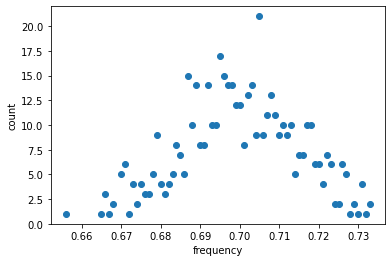

In [66]:
# Listing 3.17 Plotting measured frequencies

from collections import defaultdict

frequency_counts = defaultdict(int)
for frequency in frequency_array:
  frequency_counts[frequency] += 1

frequencies = list(frequency_counts.keys())
counts = [frequency_counts[freq] for freq in frequencies]

plt.scatter(frequencies, counts)
plt.xlabel('frequency')
plt.ylabel('count')
plt.show()

3.2.1 Binning similar points in histogram plots

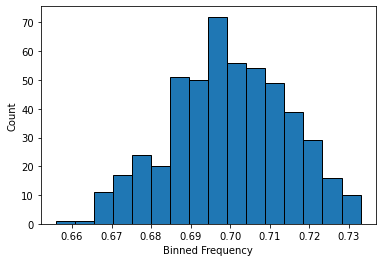

In [67]:
# Listing 3.18 Plotting a frequency histogram using plt.hist

plt.hist(frequency_array, bins='auto', edgecolor='black')
plt.xlabel('Binned Frequency')
plt.ylabel('Count')
plt.show()

Number of Bins: 16


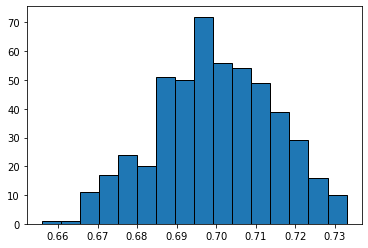

In [68]:
# Listing 3.19 Counting bins in a plotted histogram

counts, _, _ = plt.hist(frequency_array, bins='auto', edgecolor='black')
print(f"Number of Bins: {counts.size}")


Bin width: 0.004812499999999997


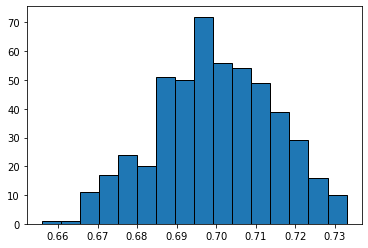

In [69]:
# Listing 3.20 Finding the width of bins in a histogram

counts, bin_edges, _ = plt.hist(frequency_array, bins='auto', edgecolor='black')

bin_width = bin_edges[1] - bin_edges[0]
assert bin_width == (max_freq - min_freq) / counts.size
print(f"Bin width: {bin_width}")

In [70]:
# Listing 3.21 Getting a bin’s frequency and size

def output_bin_coverage(i):
  count = int(counts[i])
  range_start, range_end = bin_edges[i], bin_edges[i+1]
  range_string = f"{range_start} - {range_end}"
  print(f"The bin for frequency range {range_string} contains "
        f"{count} element{' ' if count == 1 else 's'}")

output_bin_coverage(0)
output_bin_coverage(5)


The bin for frequency range 0.656 - 0.6608125 contains 1 element 
The bin for frequency range 0.6800625 - 0.684875 contains 20 elements


In [71]:
# Listing 3.22 Finding the index of an array’s maximum value
assert counts[counts.argmax()] == counts.max()

# Listing 3.23 Using argmax to return a histogram’s peak
output_bin_coverage(counts.argmax())


The bin for frequency range 0.6945 - 0.6993125 contains 72 elements


3.2.2 Deriving probabilities from histograms

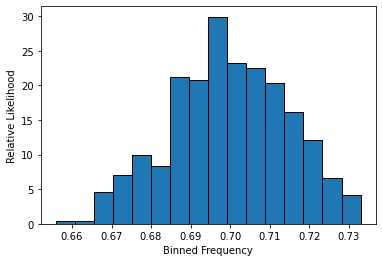

In [72]:
# Listing 3.24 Plotting a histogram’s relative likelihoods

likelihoods, bin_edges, _ = plt.hist(frequency_array, bins='auto', edgecolor='black', density=True)

plt.xlabel('Binned Frequency')
plt.ylabel('Relative Likelihood')
plt.show()


In [73]:
assert likelihoods.sum() * bin_width == 1.0

In [74]:
# Listing 3.26 Computing the probability of the peak frequencies

index = likelihoods.argmax()
area = likelihoods[index] * bin_width
range_start, range_end = bin_edges[index], bin_edges[index+1]
range_string = f"{range_start} - {range_end}"
print(f"Sampled frequency falls within interval {range_string} with probability {area}")

Sampled frequency falls within interval 0.6945 - 0.6993125 with probability 0.144


In [75]:
peak_index = likelihoods.argmax()
start_index, end_index = (peak_index -1, peak_index + 2)
area = likelihoods[start_index: end_index + 1].sum() * bin_width
range_start, range_end = bin_edges[start_index], bin_edges[end_index]
range_string = f"{range_start} - {range_end}"
print(f"Sampled frequency falls within interval {range_string} with probability {area}")

Sampled frequency falls within interval 0.6896875 - 0.704125 with probability 0.464


In [79]:
# Listing 3.28 Computing a high confidence interval

def compute_high_confidence_interval(likelihoods, bin_width):
  peak_index = likelihoods.argmax()
  area = likelihoods[peak_index] * bin_width
  start_index, end_index = peak_index, peak_index + 1
  while area < 0.95:
    if start_index > 0:
      start_index -= 1
    if end_index < likelihoods.size - 1:
      end_index += 1
    area = likelihoods[start_index: end_index + 1].sum() * bin_width
  range_start, range_end = bin_edges[start_index], bin_edges[end_index]
  range_string = f"{range_start:.6f} - {range_end:.6f}"
  print((f"The frequency range {range_string} represetns a "
          f"{100 * area:.2f}% confidence interval"))
  return start_index, end_index

compute_high_confidence_interval(likelihoods, bin_width)

The frequency range 0.670438 - 0.723375 represetns a 95.40% confidence interval


(3, 14)

3.2.3 Shrinking the range of a high confidence interval

In [80]:
# Listing 3.29 Sampling 100,000 frequencies

np.random.seed(0)
head_count_array = np.random.binomial(1000, 0.7, 100000)
frequency_array = head_count_array / 1000
assert frequency_array.size == 100000

The frequency range 0.670429 - 0.727857 represetns a 95.42% confidence interval


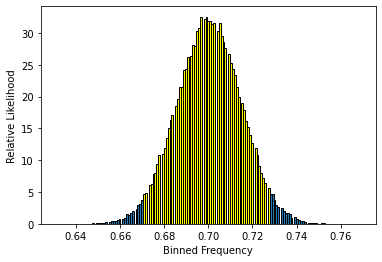

In [83]:
likelihoods, bin_edges, patches = plt.hist(frequency_array, bins='auto', edgecolor='black', density=True)

bin_width = bin_edges[1] - bin_edges[0]
start_index, end_index = compute_high_confidence_interval(likelihoods, bin_width)

for i in range(start_index, end_index):
  patches[i].set_facecolor('yellow')

plt.xlabel('Binned Frequency')
plt.ylabel('Relative Likelihood')
plt.show()



The frequency range 0.695769 - 0.703708 represetns a 95.06% confidence interval


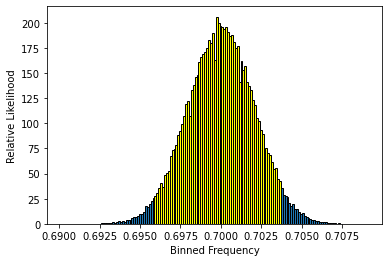

In [84]:
# Listing 3.31 Sampling 5 billion flipped coins

np.random.seed(0)
head_count_array = np.random.binomial(50000, 0.7, 100000)
frequency_array = head_count_array / 50000

likelihoods, bin_edges, patches = plt.hist(frequency_array, bins='auto', edgecolor='black', density=True)
bin_width = bin_edges[1] - bin_edges[0]
start_index, end_index = compute_high_confidence_interval(likelihoods, bin_width)

for i in range(start_index, end_index):
  patches[i].set_facecolor('yellow')
plt.xlabel('Binned Frequency')
plt.ylabel('Relative Likelihood')
plt.show()

3.2.4 Computing histograms in NumPy

In [85]:
# Listing 3.32 Computing a histogram using np.histogram

np.random.seed(0)
likelihoods, bin_edges = np.histogram(frequency_array, bins='auto', density=True)
bin_width = bin_edges[1] - bin_edges[0]
compute_high_confidence_interval(likelihoods, bin_width)

The frequency range 0.695769 - 0.703708 represetns a 95.06% confidence interval


(47, 114)

### 3.3 Using confidence intervals to analyze a biased deck of cards

In [88]:
# Listing 3.33 Generating a random red card count

np.random.seed(0)
total_cards = 52
red_card_count = np.random.randint(0, total_cards + 1)

# Listing 3.34 Generating a black card count

black_card_count = total_cards - red_card_count
assert black_card_count != red_card_count


In [90]:
# Listing 3.35 Computing card probabilities using a sample space

weighted_sample_space = {'red_card': red_card_count, 'black_card': black_card_count}
prob_red = compute_event_probability(lambda x: x == 'red_card', weighted_sample_space)
assert prob_red == red_card_count / total_cards

In [92]:
# Listing 3.37 Simulating a random card

np.random.seed(0)
color = 'red' if np.random.binomial(1, prob_red) else 'black'
print(f"The first card in the shuffled deck is {color}")

The first card in the shuffled deck is red


In [94]:
# Listing 3.38 Simulating 10 random cards

np.random.seed(0)
red_count = np.random.binomial(10, prob_red)
print(f"In {red_count} out of 10 shuffles, a red card came up first. ")

In 8 out of 10 shuffles, a red card came up first. 


In [98]:
# Listing 3.39 Computing card probability confidence intervals

np.random.seed(0)
red_card_count_array = np.random.binomial(50000, prob_red, 100000)
frequency_array = red_card_count_array / 50000

likelihoods, bin_edges = np.histogram(frequency_array, bins='auto', density=True) 
bin_width = bin_edges[1] - bin_edges[0]
start_index, end_index = compute_high_confidence_interval(likelihoods, bin_width)


The frequency range 0.842865 - 0.849139 represetns a 95.16% confidence interval


In [99]:
# Listing 3.40 Estimating the red card count

range_start = round(0.842771 * total_cards)
range_end = round(0.849139 * total_cards)
print(f"The number of red cards in the deck is between {range_start} and {range_end}")

The number of red cards in the deck is between 44 and 44


In [101]:
# Listing 3.41 Validating the red card count

if red_card_count == 44:
  print('We are correct! There are 44 red cards in the deck.')
else:
  print('Oops! Our sample estimation was wrong.')

We are correct! There are 44 red cards in the deck.


### 3.4 Using permutations to shuffle cards

In [103]:
# Listing 3.42 Shuffling a four-card deck

np.random.seed(0)
card_deck = [1,1,0,0]
np.random.shuffle(card_deck)
print(card_deck)

[0, 0, 1, 1]


In [108]:
# Listing 3.43 Returning a copy of the shuffled deck 

np.random.seed(0)
unshuffled_deck = [1,1,0,0]
shuffled_deck = np.random.permutation(unshuffled_deck)
assert unshuffled_deck == [1,1,0,0]
print(shuffled_deck)

[0 0 1 1]


In [ ]:
# Listing 3.44 Iterating over card permutations